In [1]:
#!pip install xgboost


In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Convert the dataset into an optimized data structure called DMatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': 3
}

# Number of boosting rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)


In [5]:
# Make predictions
preds = bst.predict(dtest)
pred_labels = np.argmax(preds, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, pred_labels)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, pred_labels))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



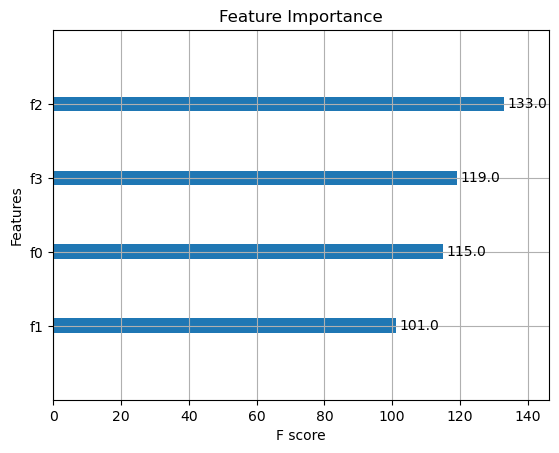

In [6]:
# Plot feature importance
xgb.plot_importance(bst)
plt.title('Feature Importance')
plt.show()
